0       0.711918
1       1.447029
2       0.624346
3       1.071159
4       0.454724
          ...   
1995    2.764033
1996    3.637099
1997    2.669768
1998    2.607505
1999    2.440574
Name: x, Length: 2000, dtype: float64


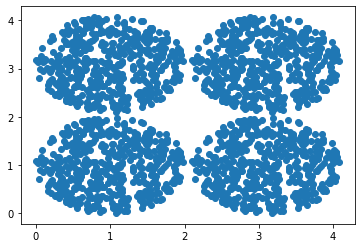

In [1]:
%matplotlib inline
import numpy
import matplotlib.pyplot as plt
import pandas
from scipy.spatial import distance

# Specify numer of clusters to find
k = 4

file_string = "fourCircles.txt"
train_data = pandas.read_csv(file_string, sep=" ", header=None)
train_data.columns = ["x", "y"]

print(train_data["x"])

plt.scatter(train_data["x"], train_data["y"])
plt.show()

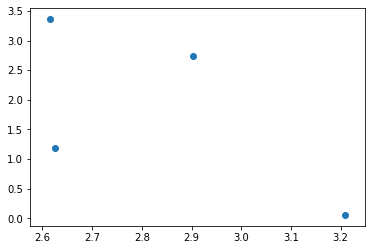

In [2]:
# Identify a seed for consistent results
seed = 4
# Sample K Random Points
train_data_centroids = train_data.sample(n = k, random_state = seed)

plt.scatter(train_data_centroids["x"], train_data_centroids["y"])
plt.show()

In [27]:
cluster_group_array = []

num_iterations = 20
for iteration_index in list(range(0, num_iterations)):
    

for index, row in train_data.iterrows():
    closest_centroid = None
    prev_distance = float("inf")
    cluster_group = None
    
    cluster_group_index = 0

    for i, centroid_row in train_data_centroids.iterrows():
        if (index == 0):
            closest_centroid = centroid_row

#         euclidean_distance = numpy.linalg.norm(centroid_row - row)

        euclidean_distance = distance.euclidean(
            [centroid_row["x"], centroid_row["y"]],
            [row["x"], row["y"]]
        )

        if (euclidean_distance < prev_distance):
            cluster_group = cluster_group_index
            closest_centroid = centroid_row
            prev_distance = euclidean_distance

        cluster_group_index = cluster_group_index + 1

    cluster_group_array.append(cluster_group)

# This adds the cluster_group, which will be used to filter the data
dataframe = pandas.DataFrame(
    {
        'x': train_data["x"],
        'y': train_data["y"],
        'cluster_group': cluster_group_array
    }
)

[0, 1, 2, 3]
 --- 


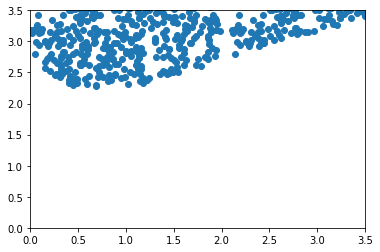

 --- 


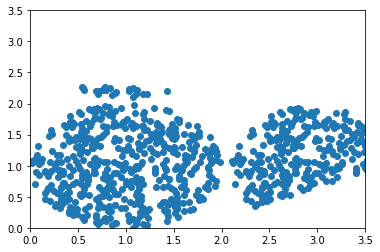

 --- 


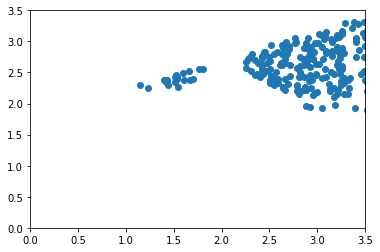

 --- 


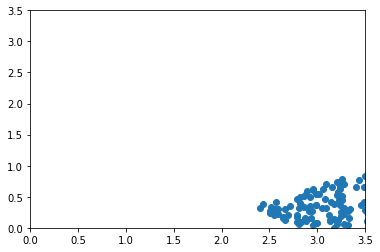

In [31]:
# print(dataframe['cluster_group'])
for i in list(range(0, k)):
    print(' --- ')
#     print(dataframe[dataframe['cluster_group'] == i])
    plt.scatter(dataframe[dataframe['cluster_group'] == i]["x"], dataframe[dataframe['cluster_group'] == i]["y"])
    plt.xlim(0, 3.5)
    plt.ylim(0, 3.5)
    plt.show()

In [ ]:
# Find the centroids for each cluster

for i in list(range(0, k)):
    print(' --- ')
    dataframe_grouping = dataframe[dataframe['cluster_group'] == i]
    
    
    centroid = dataframe_grouping.sub(dataframe_grouping.mean()).pow(2).sum(1).idxmin()
    plt.scatter(dataframe[dataframe['cluster_group'] == i]["x"], dataframe[dataframe['cluster_group'] == i]["y"])
    plt.xlim(0, 3.5)
    plt.ylim(0, 3.5)
    plt.show()